**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( B )

---


Analista de dados:
* William Teixeira Pires Junior

---

# Análise Exploratória dos Dados

## Carregando os dados e pequenos ajustes

In [2]:
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy
from itertools import combinations
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

Essa base de dados não tem uma linha com o nome das colunas, então adicionamos manualmente os nomes conforme descrito no arquivo `breast-cancer-wisconsin.names`.

In [3]:
colNames = ["ID", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion", 
            "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "Class"]
data = pandas.read_csv('breast-cancer-wisconsin.csv', names=colNames, na_values='?')
print('Número de linhas: ', len(data))
print('Número de colunas: ', len(data.columns))
data.head()

Número de linhas:  699
Número de colunas:  11


,ID,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
data = data.drop(['ID'], axis=1)

Podemos ver que a base possui 11 colunas sendo 1 para a classe que queremos prever e outra para ID, que não é útil na solução do problema e foi então removida da base de dados. As outras 9 colunas tem relação com a característica do tumor, sendo compostas de valores inteiros que variam de 1 a 10.

## Resolvendo entradas nulas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClumpThickness            699 non-null    int64  
 1   UniformityCellSize        699 non-null    int64  
 2   UniformityCellShape       699 non-null    int64  
 3   MarginalAdhesion          699 non-null    int64  
 4   SingleEpithelialCellSize  699 non-null    int64  
 5   BareNuclei                683 non-null    float64
 6   BlandChromatin            699 non-null    int64  
 7   NormalNucleoli            699 non-null    int64  
 8   Mitoses                   699 non-null    int64  
 9   Class                     699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Podemos ver que a coluna `BareNuclei` tem 16 valores nulos, e usaremos a técnica `MissForest` para imputar os valores ausentes na base de dados.

In [7]:
imputer = MissForest()
dataForImputation = data.drop('Class', axis=1)
imputedData = imputer.fit_transform(dataForImputation)

C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Iteration: 0
Iteration: 1
Iteration: 2


C:\Users\willi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [8]:
imputedDataframe = pandas.DataFrame(imputedData, columns=colNames[1:10])
imputedDataframe['Class'] = data['Class']
imputedDataframe['BareNuclei'].value_counts()

1.000000     408
10.000000    132
2.000000      30
5.000000      30
3.000000      28
8.000000      21
4.000000      19
9.000000       9
7.000000       8
6.000000       4
1.254206       2
4.750000       1
1.046576       1
5.050000       1
9.580000       1
1.171692       1
1.591446       1
7.470000       1
7.230000       1
Name: BareNuclei, dtype: int64

O algoritmo converte os valores de todas as colunas para o tipo `float`, além de imputar valores não inteiros. 

Vamos então converter os valores de todas as colunas para o tipo `int` realizando o arredondamento de valores não inteiros.

In [9]:
for col in colNames[1:10]:
    imputedDataframe[col] = imputedDataframe[col].apply(lambda x: round(x))
imputedDataframe.head()


,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Visualização dos Dados

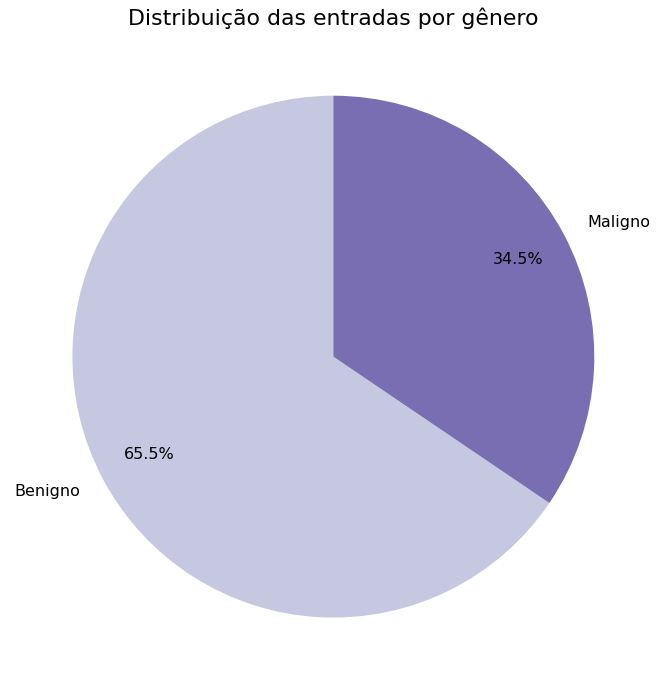

In [25]:
# Seleção dos valores possíveis para gênero
classes = list(dict.fromkeys(imputedDataframe['Class']))

# Atribuição de dados para o gráfico
values = [value / len(data) for value in list(dict.fromkeys(imputedDataframe['Class'].value_counts()))]
labels = ["Benigno", "Maligno"]
colors = seaborn.color_palette('Purples', n_colors=2)

# Criação do gráfico
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1, 
       textprops={'fontsize': 16})
ax.set_title('Distribuição das entradas por gênero', fontsize=22)
fig.savefig('qtd_genero.png')
plt.show()

<AxesSubplot:>

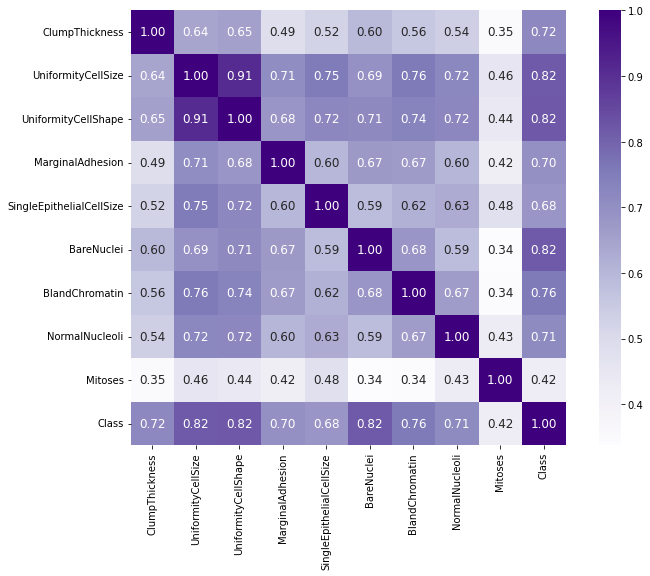

In [22]:
plt.figure(figsize=(12,8))
correlated=imputedDataframe.corr()
seaborn.heatmap(correlated,annot=True,cbar=True,square=True,cmap='Purples',annot_kws={'size':12},fmt='.2f')

Há uma boa divisão na quantidade de entradas para cada classe (dois para um), e uma correlação moderada para alta entre todas as características e a classe (com exceção da `Mitoses`). Essas características devem evitar problemas de grandes diferenças na acurácia a depender das amostras selecionadas para teste, ou seja, o modelo pode vir a obter uma boa precisão.

Como o modelo `SVM` funciona tentando separar as classes por meio de um hiperplano, vamos analisar alguns gráficos de dispersão para ter uma ideia de quão separável as classes são a partir das características presentes na base de dados. Pontos mais opacos significam múltiplas amostras do mesmo tipo, enquanto pontos com tonalidade mais escura e marrom indicam sobreposição de amostras de classes diferentes.

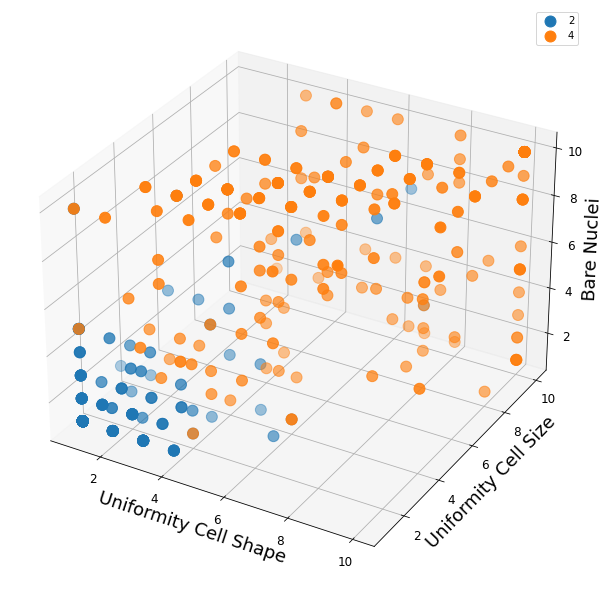

In [26]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in imputedDataframe.groupby('Class').groups.items():
    x = imputedDataframe.iloc[grpIdx, 2]
    y = imputedDataframe.iloc[grpIdx, 1]
    z = imputedDataframe.iloc[grpIdx, 5]
    ax.scatter(x, y, z, label=grpName, s=120)
    
ax.set_xlabel('Uniformity Cell Shape', fontsize=18)
ax.set_ylabel('Uniformity Cell Size', fontsize=18)
ax.set_zlabel('Bare Nuclei', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

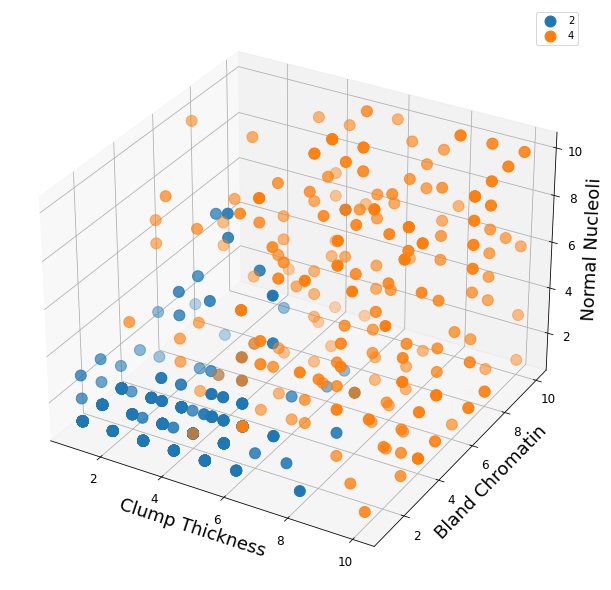

In [27]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in imputedDataframe.groupby('Class').groups.items():
    x = imputedDataframe.iloc[grpIdx, 0]
    y = imputedDataframe.iloc[grpIdx, 6]
    z = imputedDataframe.iloc[grpIdx, 7]
    ax.scatter(x, y, z, label=grpName, s=120)

ax.set_xlabel('Clump Thickness', fontsize=18)
ax.set_ylabel('Bland Chromatin', fontsize=18)
ax.set_zlabel('Normal Nucleoli', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

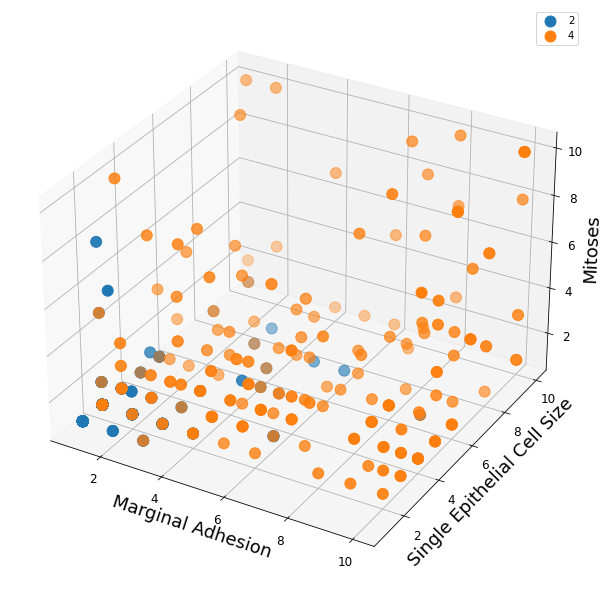

In [28]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

for grpName, grpIdx in imputedDataframe.groupby('Class').groups.items():
    x = imputedDataframe.iloc[grpIdx, 3]
    y = imputedDataframe.iloc[grpIdx, 4]
    z = imputedDataframe.iloc[grpIdx, 8]
    ax.scatter(x, y, z, label=grpName, s=120)

ax.set_xlabel('Marginal Adhesion', fontsize=18)
ax.set_ylabel('Single Epithelial Cell Size', fontsize=18)
ax.set_zlabel('Mitoses', fontsize=18)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

Podemos ver que as características com maior correlação, quando comparadas juntas, permitem uma maior separabilidade das classes, enquanto as características com menor correlação tem o comportamento oposto. Abaixo geramos os gráficos de dispersão para todas as combinações de 3 características possíveis e salvamos em um PDF, que apesar de não ter fornecido nenhuma nova observação, confirma a feita anteriormente.

In [29]:
col = colNames[1:]
page = 1
with PdfPages('scatter_plots.pdf') as pdf:
    for x, y, z in combinations(range(0, 8), 3):
        fig = plt.figure(figsize=(15,10))
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

        for grpName, grpIdx in imputedDataframe.groupby('Class').groups.items():
            xd = imputedDataframe.iloc[grpIdx, x]
            yd = imputedDataframe.iloc[grpIdx, y]
            zd = imputedDataframe.iloc[grpIdx, z]
            ax.scatter(xd, yd, zd, label=grpName, s=120)

        xl = col[x]
        yl = col[y]
        zl = col[z]
        ax.set_xlabel(xl, fontsize=18)
        ax.set_ylabel(yl, fontsize=18)
        ax.set_zlabel(zl, fontsize=18)
        ax.tick_params(axis='both', labelsize=12)
        ax.set_title('Scatter Plot - Page {}'.format(page))
        ax.legend()
        page += 1
        plt.savefig(pdf, format='pdf')
        plt.close()



Por fim, exportamos a base de dados tratada, para que possa ser utilizada na solução do problema.

In [56]:
imputedDataframe.to_csv('breast-cancer-wisconsin-imputed.csv', index=False)